In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drct = '/home/somayeh/Documents/Career/Data_Incubator/Project/'
filename1 = 'application.tsv'
filename2 = 'cpc_current.tsv'
filename3 = 'uspatentcitation.tsv'


In [3]:
df_chunk = pd.read_csv(drct+filename3,sep='\t',header=0, chunksize=1000000)
patent_list = []  
for cnt, chunk in enumerate(df_chunk):
    print(cnt)
    chunk['year'] = pd.to_datetime(chunk['date'], format = '%Y-%M-%d', errors='coerce').dt.year
    chunk = chunk[(chunk.year>2000)&(chunk.year<2020)]
#     chunk.drop(['uuid', 'date', 'name', 'kind','country','category','sequence'], axis=1)
    patent_list.append(chunk[['patent_id','citation_id','year']])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87


In [5]:
df = pd.concat(patent_list)

In [6]:
del patent_list

In [7]:
#10 most cited patents for the time interval
from collections import defaultdict
citations = df.patent_id

appearances = defaultdict(int)
for curr in citations:
    appearances[curr] += 1


In [14]:
from heapq import nlargest

largest = nlargest(5, appearances, key=appearances.get)
largest

# cat =['Agriculture', ]

['9980729', '9986419', '10201349', '10206676', '10206678']

In [15]:
all_yr_ci =[]
for yr in range(2001,2020):
    all_yr_ci.append(len(df.loc[(df['year']==yr)]))

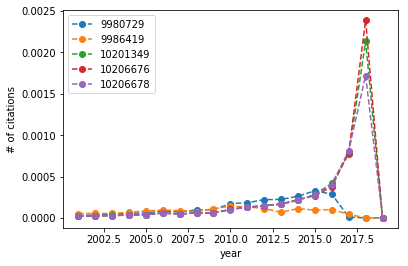

In [18]:
for n in range(5):
    yr_ci=[]
    for cnt,yr in enumerate(range(2001,2020)):
        citations_df = df.loc[(df['year']==yr) &(df['patent_id']==largest[n])]
        yr_ci.append(len(citations_df)/all_yr_ci[cnt])
        del citations_df
    plt.plot(range(2001,2020),yr_ci,'o--', label = largest[n])
plt.xlabel('year')
plt.ylabel('# of citations')
plt.legend()

NOTES:
---

As seen in the plot, two patents "9980729" (medicine) and "9986419" (information technology), which were among the all-time top cited patents, have reached their life time as the citation trends are decreasing after 2015.
However, for the next three patents (hence their applications), it seems that the citations are diverging and there is still room for their growth.